### Problem 1: Generating Some Data As A Toy Example



Generate three clusters of data as A, B, and C. 

* A = 10 (x,y) samples from the gaussian distribution, with mean=(0,0), cov=I, i.
e., N(mean,std)

* B = 10 (x,y) samples from the gaussian distribution, with mean=(4,4), cov=I, i.e., N(mean,std)

* C = 10 (x,y) samples from the gaussian distribution, with mean=(-4,4), cov=I, i.e., N(mean,std)

*Hint: use the multivariate_normal function, and set the mean, covariance, and size for each cluster.*

In [24]:
import numpy as np
# Add code here to generate the three clusters
A = np.random.multivariate_normal(mean=[0,0],cov=np.eye(2),size=10)
B = np.random.multivariate_normal(mean=[4,4],cov=np.eye(2),size=10)
C = np.random.multivariate_normal(mean=[-4,4],cov=np.eye(2),size=10)

Visualize the true distribution of the samples by plotting them in a scatter plot. Plot the x and y coordinates for each sample in A, B, and C. Try to use a for loop to do this. 

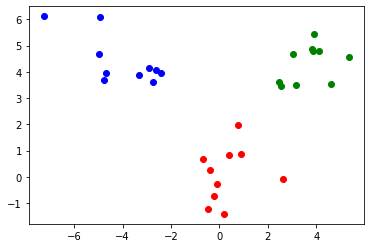

In [25]:
import matplotlib.pyplot as plt
color_list = ['r','g','b']

# Add your code here
for i, cluster in enumerate([A, B, C]):
  plt.scatter(cluster[:,0],cluster[:,1], c = color_list[i])


### Problem 2: How can we cluster these points if we do not know the labels?

First, mix and shuffle the data, which includes A, B, and C. There's a function in the numpy library that will do this. 

Then, visualize the data through a scatter plot. 

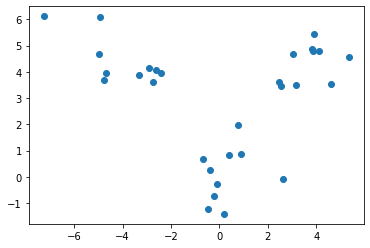

In [26]:
# Add your code here to mix and shuffle the data. Make sure data contains A, B, and C.
data = np.concatenate([A,B,C])
np.random.shuffle(data)

# Add your code to visualize the samples through a scatter plot
plt.scatter(data[:,0],data[:,1])

Now, implement the K-Means algorithm yourself. 


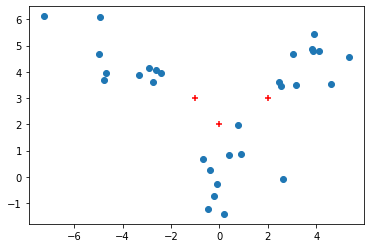

In [27]:
# How many clusters should you have? Set the value of K based on the number of clusters you created in Problem 1.
K = 3
# Select three random points as initial centers (pick any three coordinates)
centers = np.array([[0,2],[-1,3],[2,3]])


# Now visualize the center and the samples. You can add a 'marker' parameter in the numpy scatterplot function to visualize where the center is. 
plt.scatter(data[:,0],data[:,1])
plt.scatter(centers[:,0],centers[:,1],c='r', marker='+')

In [28]:
# Create a new empty array of zeros to store the distances in 
dist = np.zeros([len(data),K])

# Iterate through the clusters and fill the distance array 
# Calculate the distance between the sample to each class center. You can do this using the norm function.
for i in range(K):
  dist[:,i] = np.linalg.norm(data-centers[i],axis=1)

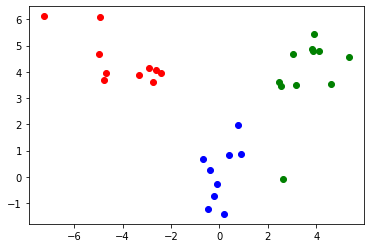

In [29]:
# Assign the class of each sample to the closest center. You can use the numpy function argmin, which returns the indices of the minimum values along an axis.
labels = np.argmin(dist, axis=1)

# Visualize the initial cluster results for the three clusters: 
for i in range(K):
  plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c=color_list[i-1])

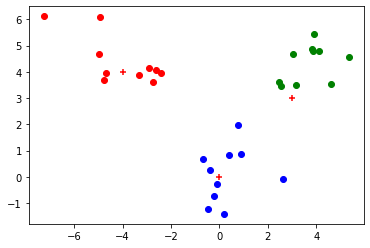

In [30]:
# Find new centers and assign new labels to the samples, then visualize again
for i in range(K):
  centers[i] = np.mean(data[labels == i],axis=0)

# Calculate the new distance the way you did before
dist = np.zeros([len(data),K])
for i in range(K):
  dist[:,i] = np.linalg.norm(data-centers[i],axis=1)

# Assign new labels like you did before using argmin
labels = np.argmin(dist, axis=1)

# Visualize the data again 
for i in range(K):
  plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c=color_list[i-1])

# Plot the centers as a scatter plot
plt.scatter(centers[:,0],centers[:,1],c='r', marker='+')

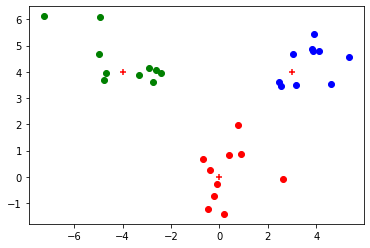

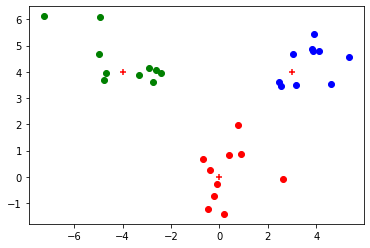

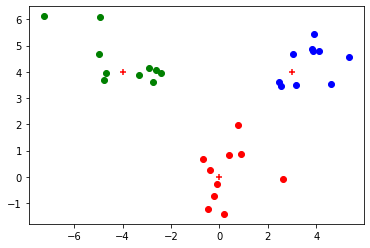

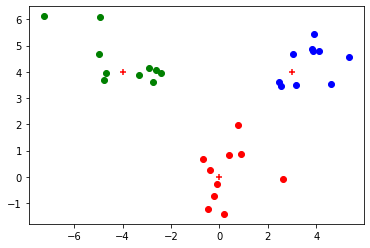

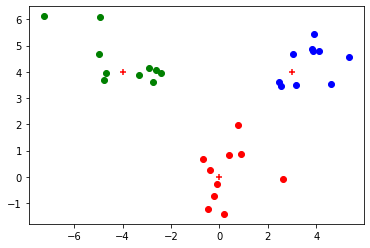

In [31]:
# Iterate finding new centers and assigning new labels 5 times. Hint: you have all the code for one time above. 
for iter in range(5):
  for i in range(K):
  # Find new centers
    centers[i] = np.mean(data[labels == i],axis=0)
  # Calculate the new distance
  dist = np.zeros([len(data),K])
  for i in range(K):
      dist[:,i] = np.linalg.norm(data-centers[i],axis=1)

  # Assign new labels
  labels = np.argmin(dist, axis=1)

  # Visualize in 5 figures respectively to see the convergence
  plt.figure()
  for i in range(K):
      plt.scatter(data[labels==i][:,0],data[labels==i][:,1],c=color_list[i])
  plt.scatter(centers[:,0],centers[:,1],c='r', marker='+')